In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

In [41]:
log_reg = LogisticRegression(solver='liblinear', max_iter=100000)
rand_forest = RandomForestClassifier()


In [42]:
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rand_forest)
    ],
    voting='hard'
)

In [73]:
df = pd.read_csv("new_merge_2.csv")

X= df.iloc[:, 2:]
Y=df.iloc[:,1]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_classification_reports = []
fold_importances = []

for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"Fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    ensemble_model.fit(X_train, Y_train)

    Y_pred = ensemble_model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='macro', zero_division=0)
    recall = recall_score(Y_test, Y_pred, average='macro', zero_division=0)
    report = classification_report(Y_test, Y_pred, zero_division=0)

    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_classification_reports.append(report)

    rand_forest.fit(X_train, Y_train)
    fold_importance = rand_forest.feature_importances_
    fold_importances.append(fold_importance)

    # Print metrics for the current fold
    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

# Convert lists to numpy arrays for easier manipulation
fold_accuracies = np.array(fold_accuracies)
fold_precisions = np.array(fold_precisions)
fold_recalls = np.array(fold_recalls)
fold_importances = np.array(fold_importances)

# Print average metrics across all folds
print("Non-weighted Average Metrics:")
print(f"Mean Accuracy: {fold_accuracies.mean():.4f}")
print(f"Mean Precision: {fold_precisions.mean():.4f}")
print(f"Mean Recall: {fold_recalls.mean():.4f}")


Fold: 1
Accuracy for fold 1: 0.9276
Recall for fold 1: 0.7957
Precision for fold 1: 0.9109
-----
Fold: 2
Accuracy for fold 2: 0.9311
Recall for fold 2: 0.8079
Precision for fold 2: 0.9421
-----
Fold: 3
Accuracy for fold 3: 0.9221
Recall for fold 3: 0.7922
Precision for fold 3: 0.9346
-----
Fold: 4
Accuracy for fold 4: 0.9321
Recall for fold 4: 0.8384
Precision for fold 4: 0.9227
-----
Fold: 5
Accuracy for fold 5: 0.9196
Recall for fold 5: 0.7986
Precision for fold 5: 0.9287
-----
Non-weighted Average Metrics:
Mean Accuracy: 0.9265
Mean Precision: 0.9278
Mean Recall: 0.8066


<Axes: xlabel='importances', ylabel='features'>

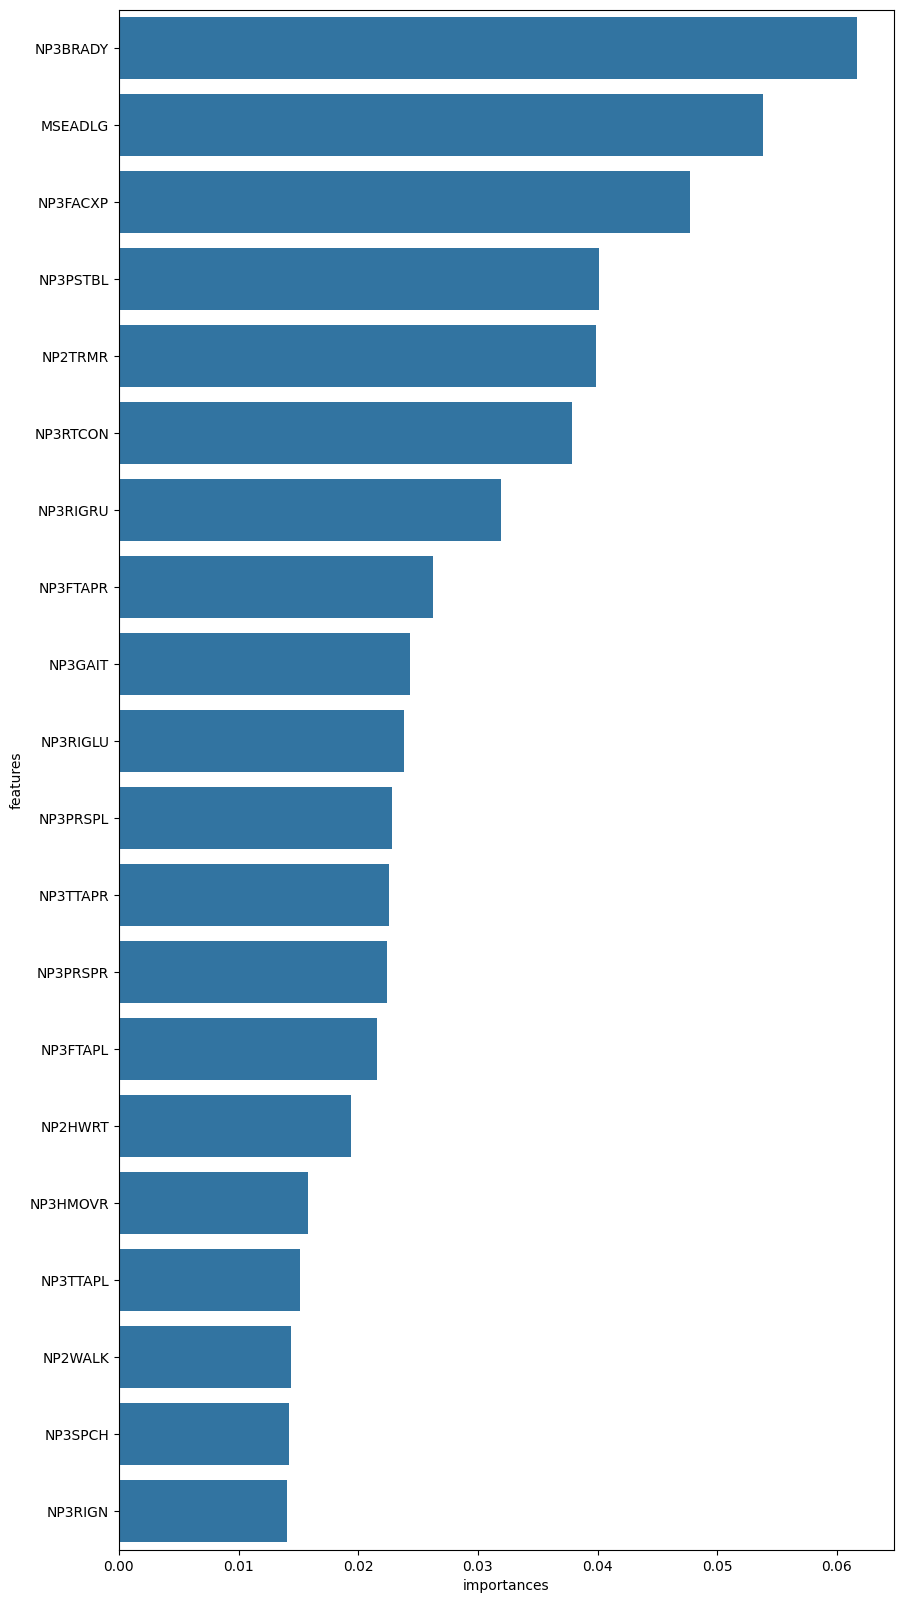

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = fold_importances.mean(axis=0).tolist()
importances_df = pd.DataFrame({
    'features': X.columns.tolist(),
    'importances': importance    
})

plt.figure(figsize = (10, 20))
sns.barplot(importances_df.sort_values('importances', ascending=False).head(20), x='importances', y='features')

In [69]:
df = pd.read_csv("only_motor_2.csv")

X= df.iloc[:, 2:]
Y=df.iloc[:,1]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_classification_reports = []
fold_importances = []

for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"Fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    ensemble_model.fit(X_train, Y_train)

    Y_pred = ensemble_model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='macro', zero_division=0)
    recall = recall_score(Y_test, Y_pred, average='macro', zero_division=0)
    report = classification_report(Y_test, Y_pred, zero_division=0)

    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_classification_reports.append(report)

    rand_forest.fit(X_train, Y_train)
    fold_importance = rand_forest.feature_importances_
    fold_importances.append(fold_importance)

    # Print metrics for the current fold
    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

# Convert lists to numpy arrays for easier manipulation
fold_accuracies = np.array(fold_accuracies)
fold_precisions = np.array(fold_precisions)
fold_recalls = np.array(fold_recalls)
fold_importances = np.array(fold_importances)

# Print average metrics across all folds
print("Non-weighted Average Metrics:")
print(f"Mean Accuracy: {fold_accuracies.mean():.4f}")
print(f"Mean Precision: {fold_precisions.mean():.4f}")
print(f"Mean Recall: {fold_recalls.mean():.4f}")


Fold: 1
Accuracy for fold 1: 0.9251
Recall for fold 1: 0.8158
Precision for fold 1: 0.9028
-----
Fold: 2
Accuracy for fold 2: 0.9241
Recall for fold 2: 0.8382
Precision for fold 2: 0.9106
-----
Fold: 3
Accuracy for fold 3: 0.9166
Recall for fold 3: 0.8360
Precision for fold 3: 0.9116
-----
Fold: 4
Accuracy for fold 4: 0.9226
Recall for fold 4: 0.8305
Precision for fold 4: 0.9048
-----
Fold: 5
Accuracy for fold 5: 0.9026
Recall for fold 5: 0.7928
Precision for fold 5: 0.8775
-----
Non-weighted Average Metrics:
Mean Accuracy: 0.9182
Mean Precision: 0.9014
Mean Recall: 0.8227


<Axes: xlabel='importances', ylabel='features'>

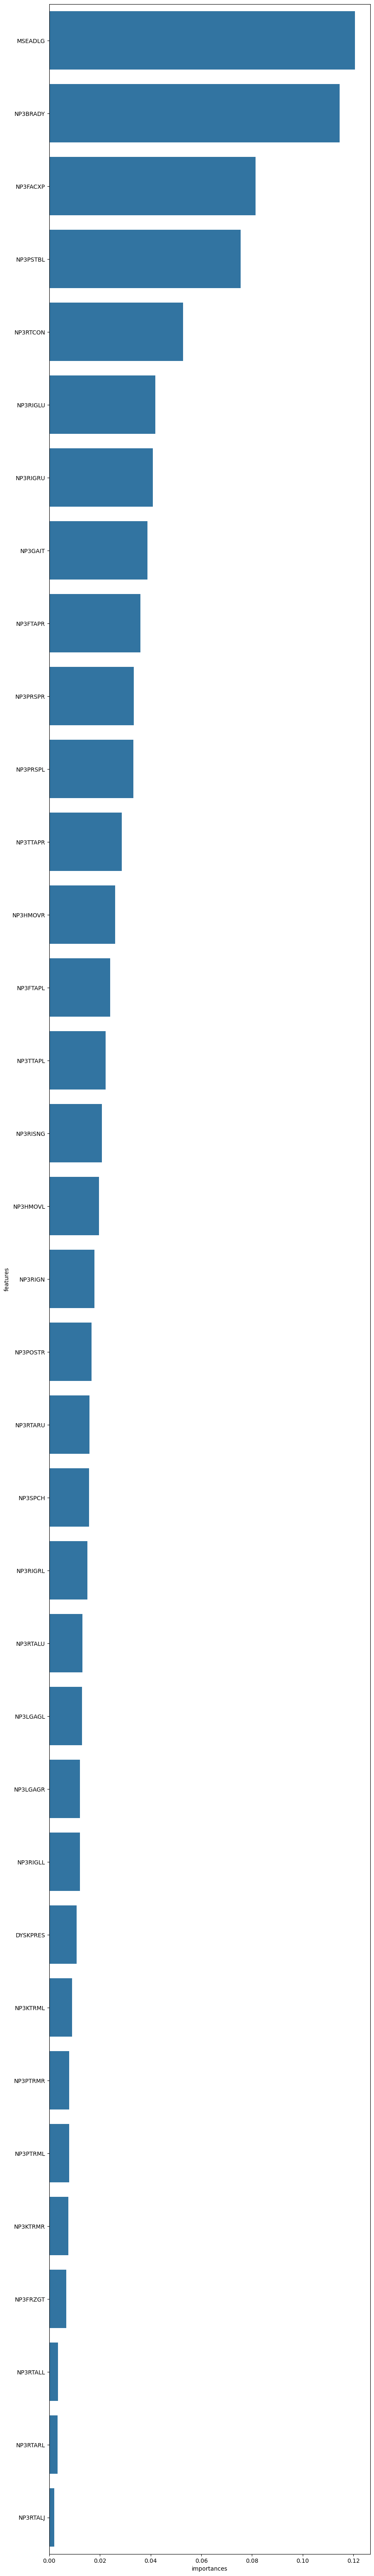

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = fold_importances.mean(axis=0).tolist()
importances_df = pd.DataFrame({
    'features': X.columns.tolist(),
    'importances': importance    
})

plt.figure(figsize = (10, 80))
sns.barplot(importances_df.sort_values('importances', ascending=False), x='importances', y='features')

In [48]:
df = pd.read_csv("only_non_motor_2.csv")

X= df.iloc[:, 2:]
Y=df.iloc[:,1]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_classification_reports = []
fold_importances = []

for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"Fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    ensemble_model.fit(X_train, Y_train)

    Y_pred = ensemble_model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='macro', zero_division=0)
    recall = recall_score(Y_test, Y_pred, average='macro', zero_division=0)
    report = classification_report(Y_test, Y_pred, zero_division=0)

    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_classification_reports.append(report)

    rand_forest.fit(X_train, Y_train)
    fold_importance = rand_forest.feature_importances_
    fold_importances.append(fold_importance)

    # Print metrics for the current fold
    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

# Convert lists to numpy arrays for easier manipulation
fold_accuracies = np.array(fold_accuracies)
fold_precisions = np.array(fold_precisions)
fold_recalls = np.array(fold_recalls)
fold_importances = np.array(fold_importances)

# Print average metrics across all folds
print("Non-weighted Average Metrics:")
print(f"Mean Accuracy: {fold_accuracies.mean():.4f}")
print(f"Mean Precision: {fold_precisions.mean():.4f}")
print(f"Mean Recall: {fold_recalls.mean():.4f}")


Fold: 1
Accuracy for fold 1: 0.7534
Recall for fold 1: 0.4969
Precision for fold 1: 0.7081
-----
Fold: 2
Accuracy for fold 2: 0.7559
Recall for fold 2: 0.5024
Precision for fold 2: 0.8214
-----
Fold: 3
Accuracy for fold 3: 0.7349
Recall for fold 3: 0.4975
Precision for fold 3: 0.7993
-----
Fold: 4
Accuracy for fold 4: 0.7359
Recall for fold 4: 0.4925
Precision for fold 4: 0.7132
-----
Fold: 5
Accuracy for fold 5: 0.7363
Recall for fold 5: 0.4904
Precision for fold 5: 0.7473
-----
Non-weighted Average Metrics:
Mean Accuracy: 0.7433
Mean Precision: 0.7579
Mean Recall: 0.4959


<Axes: xlabel='importances', ylabel='features'>

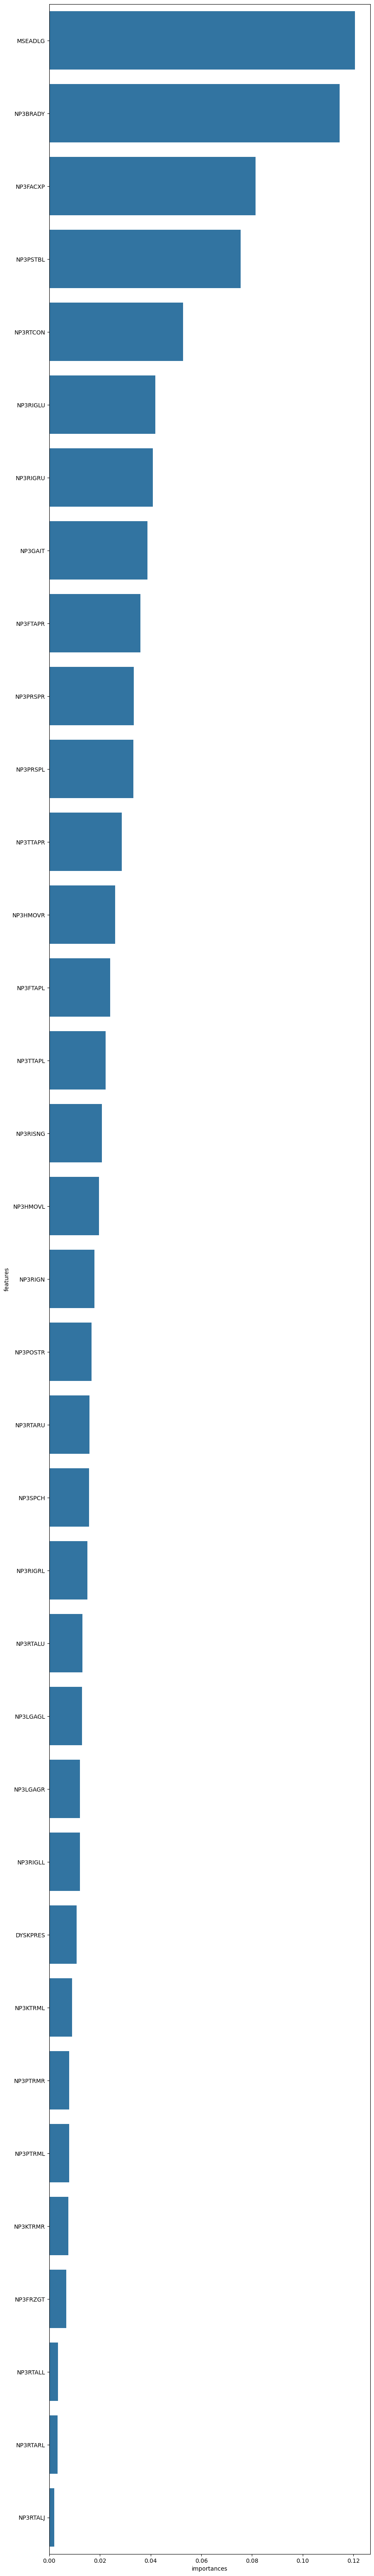

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = fold_importances.mean(axis=0).tolist()
importances_df = pd.DataFrame({
    'features': X.columns.tolist(),
    'importances': importance    
})

plt.figure(figsize = (10, 80))
sns.barplot(importances_df.sort_values('importances', ascending=False), x='importances', y='features')

In [49]:
df = pd.read_csv("only_self_report_2.csv")

X= df.iloc[:, 2:]
Y=df.iloc[:,1]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_classification_reports = []
fold_importances = []

for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"Fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    ensemble_model.fit(X_train, Y_train)

    Y_pred = ensemble_model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='macro', zero_division=0)
    recall = recall_score(Y_test, Y_pred, average='macro', zero_division=0)
    report = classification_report(Y_test, Y_pred, zero_division=0)

    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_classification_reports.append(report)

    rand_forest.fit(X_train, Y_train)
    fold_importance = rand_forest.feature_importances_
    fold_importances.append(fold_importance)

    # Print metrics for the current fold
    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

# Convert lists to numpy arrays for easier manipulation
fold_accuracies = np.array(fold_accuracies)
fold_precisions = np.array(fold_precisions)
fold_recalls = np.array(fold_recalls)
fold_importances = np.array(fold_importances)

# Print average metrics across all folds
print("Non-weighted Average Metrics:")
print(f"Mean Accuracy: {fold_accuracies.mean():.4f}")
print(f"Mean Precision: {fold_precisions.mean():.4f}")
print(f"Mean Recall: {fold_recalls.mean():.4f}")


Fold: 1
Accuracy for fold 1: 0.8497
Recall for fold 1: 0.6250
Precision for fold 1: 0.8288
-----
Fold: 2
Accuracy for fold 2: 0.8497
Recall for fold 2: 0.6293
Precision for fold 2: 0.8488
-----
Fold: 3
Accuracy for fold 3: 0.8313
Recall for fold 3: 0.6149
Precision for fold 3: 0.8162
-----
Fold: 4
Accuracy for fold 4: 0.8452
Recall for fold 4: 0.6386
Precision for fold 4: 0.8849
-----
Fold: 5
Accuracy for fold 5: 0.8377
Recall for fold 5: 0.6218
Precision for fold 5: 0.8582
-----
Non-weighted Average Metrics:
Mean Accuracy: 0.8427
Mean Precision: 0.8474
Mean Recall: 0.6259


<Axes: xlabel='importances', ylabel='features'>

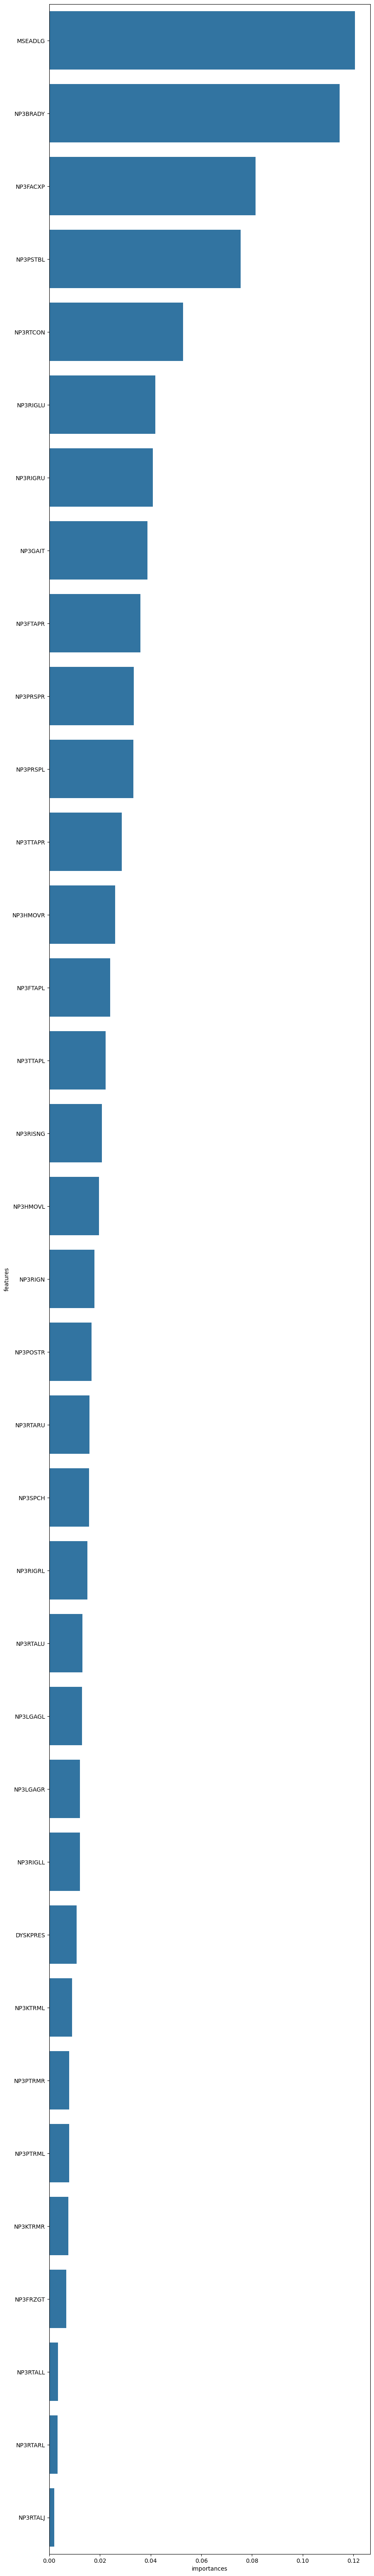

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = fold_importances.mean(axis=0).tolist()
importances_df = pd.DataFrame({
    'features': X.columns.tolist(),
    'importances': importance    
})

plt.figure(figsize = (10, 80))
sns.barplot(importances_df.sort_values('importances', ascending=False), x='importances', y='features')